Projekt MNwS - Aleksander Folfas 411052

In [44]:
import numpy as np
from scipy.stats import kstest, anderson
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt

Zadanie 6


Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa, testu Lillieforsa i testu
Andersona-Darlinga (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane
pochodzą z rozkładu 𝑡-Studenta (uwaga: żeby wyniki były porównywalne trzeba pamiętać o
standaryzacji danych). Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta.

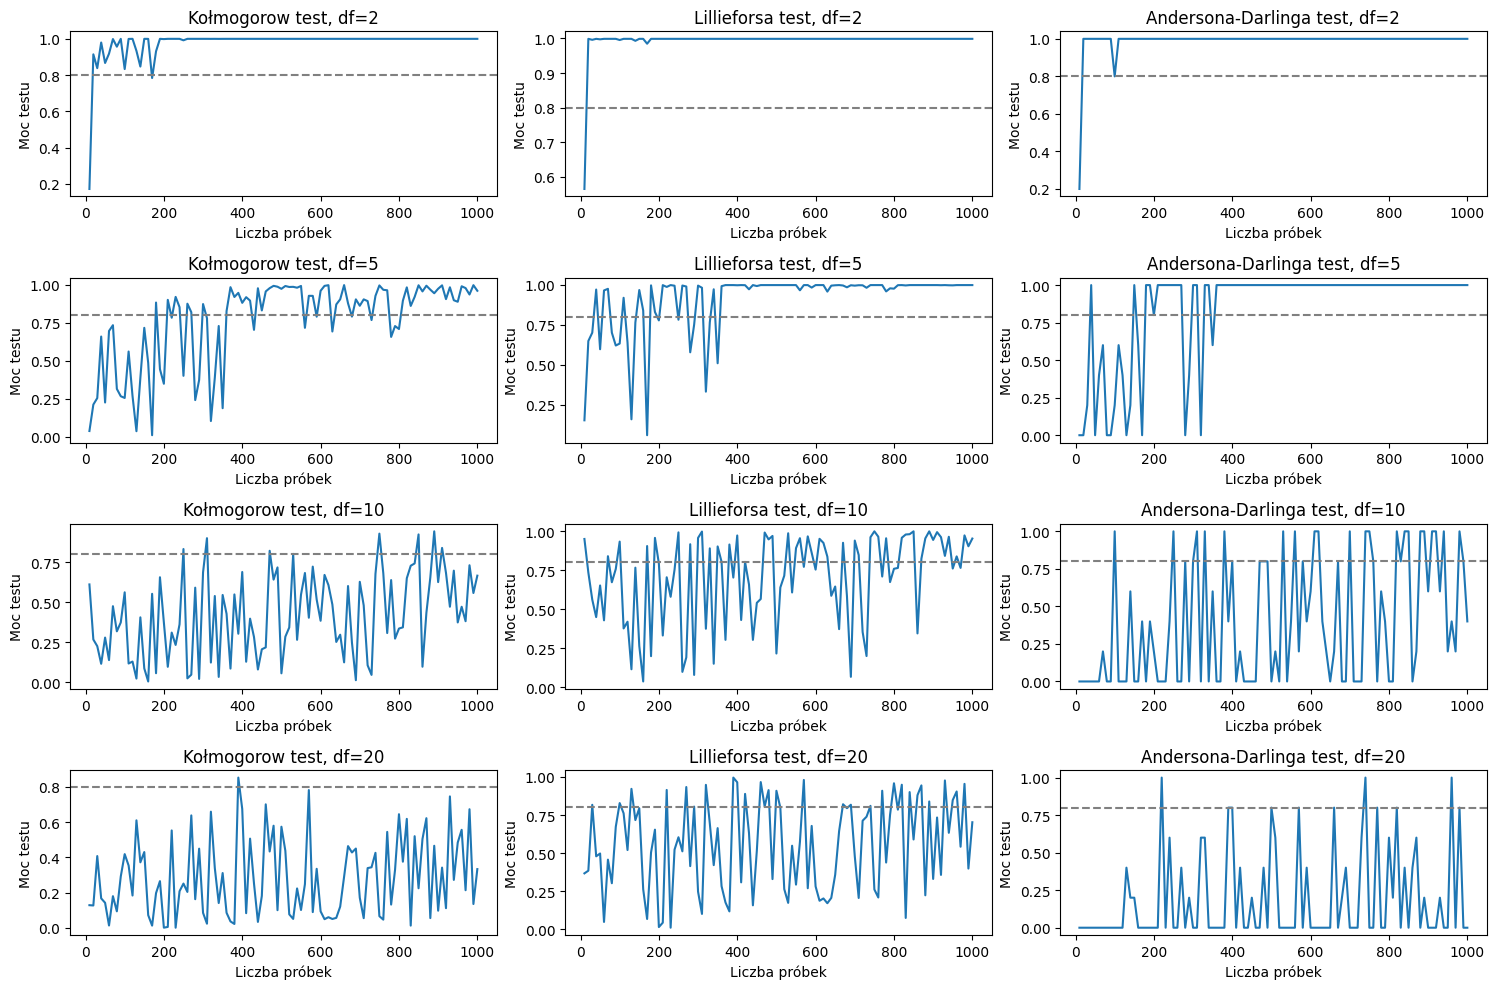

In [45]:
def compute_power(n, df):
    """
    Oblicza moce testów Kołmogorowa-Smirnowa, Lillieforsa i Andersona-Darlinga dla danych pochodzących z rozkładu t-Studenta.

    :param n: liczba próbek
    :param df: liczba stopni swobody rozkładu t-Studenta
    :return: trzy wartości float reprezentujące moce testów Kołmogorowa-Smirnowa, Lillieforsa i Andersona-Darlinga
    """
    # Generowanie danych losowych z rozkładu t-Studenta
    data = np.random.standard_t(df, n)

   # Standaryzacja danych
    data_std = (data - np.mean(data)) / np.std(data)

    # Test Kołmogorowa-Smirnowa
    ks_power = 1 - kstest(data_std, 'norm')[1]

    # Test Lillieforsa
    lf_power = 1 - lilliefors(data_std, dist='norm')[1]

    # Test Andersona-Darlinga
    ad_stat, ad_crit, _ = anderson(data_std, dist='norm')
    ad_power = np.mean(ad_stat > ad_crit)

    return ks_power, lf_power, ad_power
# Liczba stopni swobody rozkładu t-Studenta
df_list = [2, 5, 10, 20]
# Ziarno losowości
np.random.seed(411052)
# Liczba próbek
n_list = np.arange(10, 1010, 10)

# Macierz do przechowywania wyników
powers_ks = np.zeros((len(df_list), len(n_list)))
powers_lf = np.zeros((len(df_list), len(n_list)))
powers_ad = np.zeros((len(df_list), len(n_list)))

# Przeprowadzenie symulacji
for i, df in enumerate(df_list):
    for j, n in enumerate(n_list):
        powers_ks[i, j], powers_lf[i, j], powers_ad[i, j] = compute_power(n, df)

# Wykresy mocy testów dla różnych liczby próbek i stopni swobody
fig, axes = plt.subplots(nrows=len(df_list), ncols=3, figsize=(15, 10))
titles = ['Kołmogorow', 'Lillieforsa', 'Andersona-Darlinga']
for i, df in enumerate(df_list):
    for j in range(3):
        ax = axes[i, j]
        if j == 0:
            powers = powers_ks
        elif j == 1:
            powers = powers_lf
        else:
            powers = powers_ad
        ax.plot(n_list, powers[i])
        ax.set_title(f"{titles[j]} test, df={df}")
        ax.set_xlabel('Liczba próbek')
        ax.set_ylabel('Moc testu')
        ax.axhline(y=0.8, linestyle='--', color='gray')

plt.tight_layout()
plt.show()